In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
import os

In [3]:
## Removig currepted images

In [4]:
import cv2
import imghdr

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5604\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir ='Agricultural-crops'

In [6]:
image_exts =('jpeg','jpg','bmp','png')

In [7]:
## to access directory
os.listdir(data_dir)

['.ipynb_checkpoints',
 'almond',
 'banana',
 'cardamom',
 'Cherry',
 'chilli',
 'clove',
 'coconut',
 'Coffee-plant',
 'cotton',
 'Cucumber',
 'Fox_nut(Makhana)',
 'gram',
 'jowar',
 'jute',
 'Lemon',
 'maize',
 'mustard-oil',
 'Olive-tree',
 'papaya',
 'Pearl_millet(bajra)',
 'pineapple',
 'rice',
 'soyabean',
 'sugarcane',
 'sunflower',
 'tea',
 'Tobacco-plant',
 'tomato',
 'vigna-radiati(Mung)',
 'wheat']

In [8]:
os.listdir(os.path.join(data_dir,'rice'))

['image (1).jpeg',
 'image (1).jpg',
 'image (1).png',
 'image (10).jpeg',
 'image (10).jpg',
 'image (11).jpeg',
 'image (11).jpg',
 'image (12).jpeg',
 'image (12).jpg',
 'image (13).jpg',
 'image (14).jpg',
 'image (15).jpg',
 'image (18).jpg',
 'image (19).jpg',
 'image (2).jpeg',
 'image (20).jpg',
 'image (3).jpeg',
 'image (3).jpg',
 'image (4).jpeg',
 'image (4).jpg',
 'image (5).jpeg',
 'image (5).jpg',
 'image (6).jpeg',
 'image (6).jpg',
 'image (7).jpeg',
 'image (7).jpg',
 'image (8).jpeg',
 'image (8).jpg',
 'image (9).jpeg']

In [9]:
## to remove all the image having error in files 

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [10]:
#checking if images are working fine
img = cv2.imread(os.path.join('Agricultural-crops','rice','image (19).jpg'))

In [11]:
img.shape

(2560, 2560, 3)

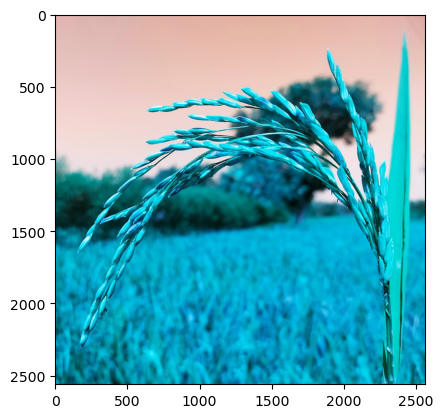

In [12]:
plt.imshow(img)

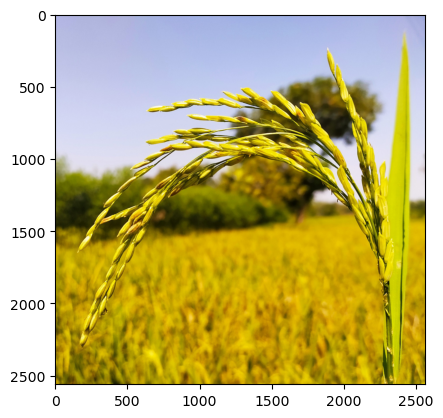

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
##loading data
#building data pipeline

In [15]:
tf.data.Dataset.list_files
##tf data set API

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [16]:
##we are using keras to load data as it does some preprocessing - like it has direct pipeline function helps built into it , it builds a dataset as per the rquirements so we need not to build labels and classes along with preprocessing tasks as well, resizes are images as well

In [17]:
data = tf.keras.utils.image_dataset_from_directory('Agricultural-crops')  #this is building the data pipeline 

Found 821 files belonging to 30 classes.


In [18]:
#using data numpy iterator we can access the file in the pipeline as directly we can not access the files in keras utils image dataset
data_iterator =data.as_numpy_iterator() #converting data into numpy iterator

In [19]:
data_iterator #allowning us to access the data pipeline

In [20]:
batch =data_iterator.next() #though this we can access the data pipeline 

In [21]:
batch[0].shape #images represented as numpy

(32, 256, 256, 3)

In [22]:
batch[1].max()

28

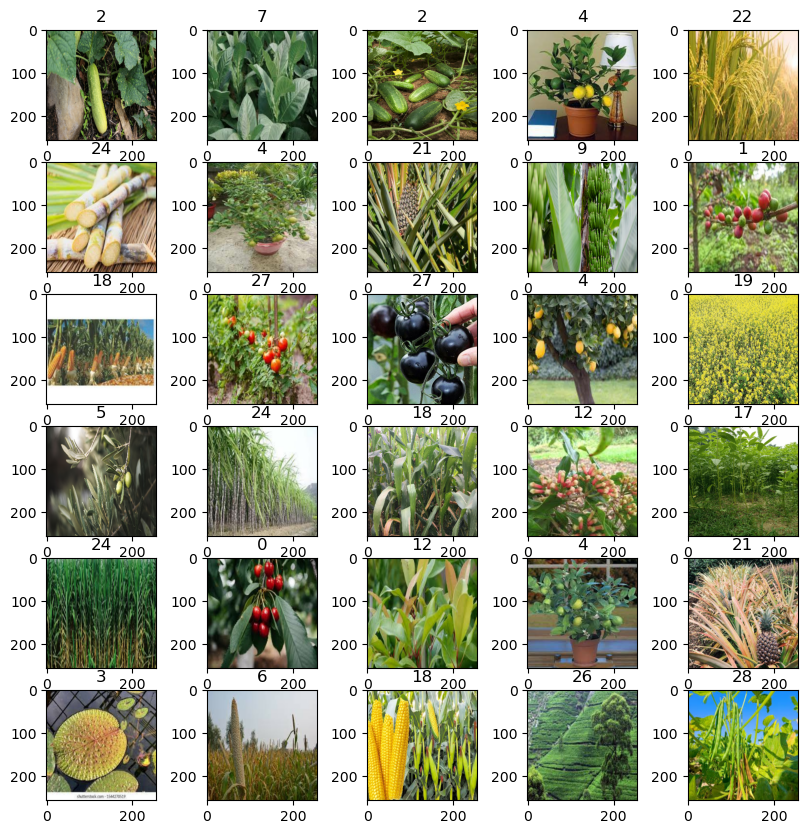

In [23]:
fig, ax = plt.subplots(ncols=5, nrows=6, figsize=(10, 10))

for idx, img in enumerate(batch[0][:30]):
    ax.flat[idx].imshow(img.astype(int))
    ax.flat[idx].set_title(batch[1][idx]) 

plt.show()

In [24]:
##Preprocessing Data
## Scaling image values btw 0-1 inttead of 0-255 so deep learning models can generalise faster and  understand it well. 
## Split our data into trainig testing and validation 

In [25]:
#our btach contains two data
#batch[0] contains - images 
#batch[1] contains - labels

In [26]:
batch[0].shape
## 32 images of batch with 256X256 size with 3 channels RGB
## as in tensorflow images are save in RGB format

(32, 256, 256, 3)

In [27]:
batch[1].shape

(32,)

In [28]:
## using dataline capability we are going to use function to scale the data btw 0-1 by deviding by 255

#### Scaling data

In [29]:
data =data.map(lambda x,y: (x/255,y))

In [30]:
##tf.data have mulitple function to use for preprocessing 

In [31]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [32]:
batch[0].max()

1.0

In [33]:
##spliting data 
train_size =int(len(data)*.7) ## to train our model 
val_size =int(len(data)*.2)*1 ## to evaluate our model
test_size=int(len(data)*.1)*1 ## to test our model

In [34]:
train_size+val_size+test_size

25

In [35]:
train = data.take(train_size) #will take train data
val = data.skip(train_size).take(val_size) #will skip train and take validation data
test = data.skip(train_size+val_size).take(test_size) #will skip train and validation data will take test data

In [36]:
len(test)

2

In [37]:
## Building the deep learning model

In [38]:
##importing dependencies
##sequential api  ( 1ip and 1op)- (2. is functional api - for multiple IP an OP ) for deeplearning classificaitions
## to build the nural leayers ( Convenutional 2d layer, Max pooling --where we will be more values , kernals and channels - denselayer, ) 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [39]:
model = Sequential() #creatition and squental var.

In [40]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(31, activation='softmax'))

#### crearting and adding sequential Layers
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
##### 1st input convolution layer with 16 filters 3X3 pixel , 1 pixel stride with relu activation 
model.add(MaxPooling2D()) # max pooling layer

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
#3 convolution layers

model.add(Flatten()) #1 flatten layer

model.add(Dense(256, activation='relu'))
model.add(Dense(30, activation='softmax'))
#### two dense layers

In [41]:
#### Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [43]:
## Train

In [44]:
logdir='logs' #to create a log folder to store the data

In [45]:
#to store tensorflow logs
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [46]:
#model.fit for trainig and model.predict - in once epoch we go one train for our training data
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


18/18 [==============================] - 13s 595ms/step - loss: 3.4372 - accuracy: 0.0347 - val_loss: 3.4043 - val_accuracy: 0.0500
Epoch 2/20
18/18 [==============================] - 11s 574ms/step - loss: 3.2896 - accuracy: 0.0851 - val_loss: 3.1417 - val_accuracy: 0.1125
Epoch 3/20
18/18 [==============================] - 11s 548ms/step - loss: 3.0386 - accuracy: 0.1458 - val_loss: 2.9146 - val_accuracy: 0.2562
Epoch 4/20
18/18 [==============================] - 11s 554ms/step - loss: 2.7407 - accuracy: 0.2517 - val_loss: 2.5557 - val_accuracy: 0.3187
Epoch 5/20
18/18 [==============================] - 10s 536ms/step - loss: 2.0639 - accuracy: 0.4566 - val_loss: 1.8545 - val_accuracy: 0.4812
Epoch 6/20
18/18 [==============================] - 10s 534ms/step - loss: 1.4015 - accuracy: 0.6441 - val_loss: 1.1158 - val_accuracy: 0.7250
Epoch 7/20
18/18 [==============================] - 10s 532ms/step - loss: 0.7308 - accuracy: 0.8212 - val_loss: 1.0926 - val_accuracy: 0.71

In [47]:
## Plot Performance 

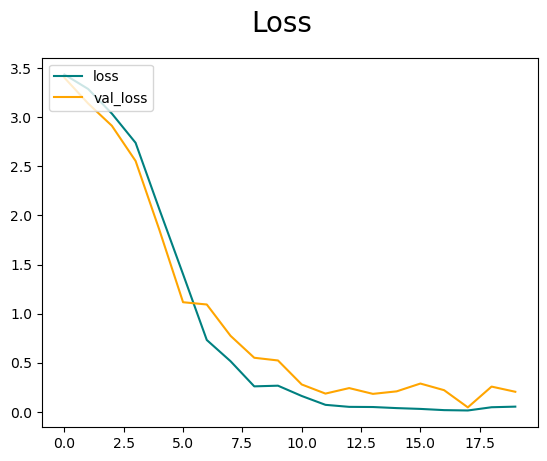

In [48]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

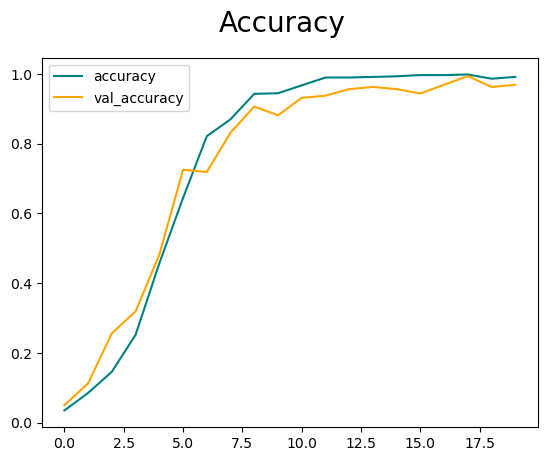

In [49]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [58]:
from tensorflow.keras.models import load_model

In [59]:
model.save(os.path.join('models','imageclassifier.h5'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
